# Simple density-independent growth 

Geometric and exponential growth are examples of density-independent growth. This captures the fundamental process of reproduction (e.g., making seeds or babies) results in a geometric series. For instance, one cell divides to make two, those two cells each divide to make four, and so on, where reproduction for each cell results in two cells, regardless of how many other cells are in the population—that is what we mean by density-independent. Therefore, most models of populations include this fundamental process of geometric increase. Second, populations can grow in a density-independent fashion when resources are plentiful. 
In this notebook, I choose to start with A. Hastings (2011)’ macroscopic approach. These propositions appear simpler. 
1. A population grows exponentially in the absence of other forces.
2. There are forces that can prevent a population from growing exponentially.

These are the consequences of the following assumptions.
- all individuals in a population are identical.
- there is no migration in or out of the population.
- the number of offspring per individual (or the per capita birth and death rates) are constant through time, and independent of the number of individuals in the population.

Here we define Density-independence in a real population as a lack of a statistical relation between the density of a population, and its per capita growth rate. The power to detect a significant relation between any two continuous variables depends on those factors which govern statistical power, such as the number of observations, the range of the predictor variable, and the strength of the underlying relation. 


## Discrete growth rates of fruit flies

Summertime, and the living is easy. Fruit flies in my kitchen, and their number’s quite high. Flies love my ripe fruit, and my red wine. They drown in the wine–I am not sure if that is good or bad.  
For now, we’ll treat fruit flies as if they grow in discrete generations. This is very common for populatilons that live in seasonal habitats - their reproduction is timed to the season, and they breed altogether in one bout.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Time,Number
0,2
1,4
2,8
3,16


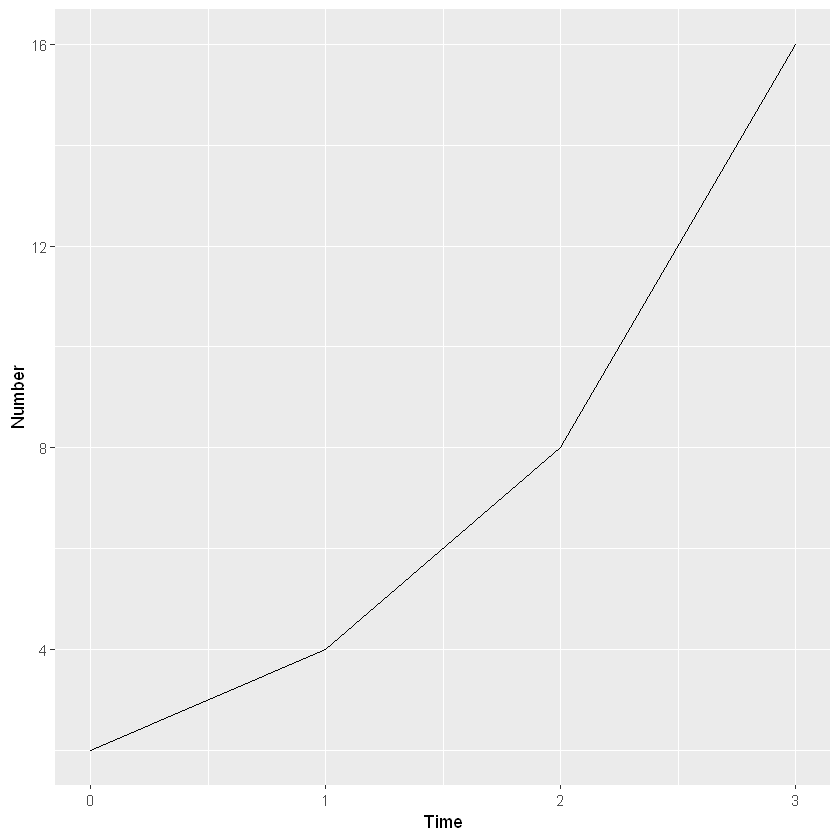

In [1]:
library ('ggplot2')
t <- c(0, 1, 2, 3)
N <- c(2, 4, 8, 16)

Data_Frame <- data.frame (

    Time = t,
    Number = N 
    
    )
Data_Frame 
ggplot(Data_Frame, aes(Time, Number)) + geom_line()

There are several ways we can describe fruit fly population growth. Here, we choose to begin by considering the proximate causes of change to population size per unit time: the numbers of births, immigration, death and emigration. 

$$
\frac {∆N}{∆t}= \frac{B+I-D-E}{∆t}
$$
Over the past month, I suspect the fruit flies are increasing primarily through reproduction in my kitchen. Clearly, at some point in the past, a fly or two (or three) must have immigrated into my kitchen, either as adults or as eggs or larvae in fruit I brought home (*I > 0*). or now, I will assume fruit fly population dynamics in my kitchen are governed by only births and deaths (*I = E = 0*). We refer to a population like this as closed, because it is closed to migration in or out. 
If I counted the number of flies last week and again this week, I can calculate the change over one week. We have 
$$
\frac {∆N}{∆t}= \frac{B-D}{∆t}
$$

Because adults give rise to offspring, we can represent births and deaths as proportions of existing **adults**. That is, as per capita rates of birth and death, as 
$$ 
 B = bN;        D = dN
$$
This reflects the biological realities that adults produce offspring, and everyone has some chance of dying. The parameter *b* could be any positive real number. This model of births reflects the geometric property of reproduction: over a specified time interval, an average parent makes *b* babies. Parameter *d* s any real number between zero and one. 

Let’s define a few terms.

- $ N_{0}, N_{1} $ - the number of flies at the start and after the first time interval.
- $ N', N" $ - distinct values of $N$, after births, but before $N_1$
- $\Delta N $ - the change in $ N $ from one point in time to another.
- $t$ is time, so $ \delta t$ is the time interval over which $N$ may change.

Let’s match these numbers to what is going on in my kitchen. or my first census count, at $t = 0$, I counted the adults and label that number $N_0$. These adults lay eggs which hatch, and then larvae and pupae develop, and become adults, giving us a population of 
$$
    N' = N_0 + bN 
$$

Some of the eggs fail to hatch, and some of the larvae die before maturing. Many of the adults die as well. If we assume the eggs, larvae, and adults all die at the same rate, then by the end of one generation we have
$$
    N_1 = N' - dN' 
$$

Substituting, we get

 $$
    N_1 = N_0 + bN_0 - d(N_0 + bN_0) 
 $$

We see that by the next time point, $ t = 1 $ the number of fruit flies should be equal to the number we started with, $ N_0 $, plus the number of new individuals, $bN_0$ minus the number of original adults that die, $ dN_0$, and minus the number of new individuals that die, $ dbN_0$. 
We can pull all of these parameters together, 
$$
    N_1 = N_0 + bN_0 - dN_0 - dbN_0 
$$

$$
    N_1 - N_0 = N_0(b - d - db) = N_0r_d  
$$
where $ r_d  = b - d - db $. 

If we know that $r_d$ is constant over time, we can infer a general rule to project the population forward in time an arbitrary number of time steps. We will let $ \lambda = 1 + r_d$. 
$$
    N_1 = N_0 + r_dN_0 = N_0 (1+r_d) = \lambda N_0 
$$
$$
    N_t = N_0 \lambda ^ t
$$

In [2]:
rd = vector()
for ( i in 2:length(N)) { 

    rd[i] = N[i] / N[i-1]  
    
    }
rd_frame <- data.frame ( 
    Week = t,
    per_capita_population_growth_rate = rd) 
rd_frame 

Week,per_capita_population_growth_rate
0,NA
1,2
2,2
3,2


## Fruit flies with continuous overlapping generations

In the reality that is my kitchen, individual fruit flies are having sex and reproducing on their own schedules. As a population, they breed continuously, so the cohorts are not synchronous. For populations like that, we need to describe instantaneous growth rates, where $\Delta t$  is no longer a fixed period of time, but is an instant, or infinity small.

In what follows, we make time more explicit so that it appears in the equation. We begin by remembering that $b$ and $d$ have time units. 
- Let $\Delta t$ be a small fraction of 1, so that the time step goes from $t$ to $ t + \Delta t$
- As $\Delta t$ shrinks, $b$ and $d$ need to shrink as well, to  $\Delta t b$ and $\Delta t d$
- $ dN/dt $ is  how we symbolize the instantaneous rate of population growth, with lower case $d$ symbolizing infinitesimally small change; it is a differential equation.

We now have to solve for the limit of $ \Delta N / \Delta t $ as $ \Delta t $ goes to zero. 
$$
    \frac{dN} {dt} = \lim_{\Delta t \to 0} (\frac {N_{t + \Delta t} - N_t} {\Delta t})
$$

Substituting, we get,

$$
    \frac{dN} {dt} = \lim_{\Delta t \to 0} (\frac {\Delta tbN_t - \Delta tdN_t - \Delta td (\Delta tb) N_t} {\Delta t})
$$

If we divide through by $\Delta t $ and then let $\Delta t \to 0$, we get 
$$
    \frac{dN} {dt} = \lim_{\Delta t \to 0} ( {bN_t - dN_t - d (\Delta tb) N_t} ) = bN_t - dN_t = r_cN
$$

To arrive at the projection equation for a continuously growing population, we integrate $rN$ with respect to time. Here we integrate population growth across time. We start by rearranging 
$$
     \frac{dN} {dt} =  r_cN,  \frac{dN} {N} = r {dt}
$$

Now we integrate $N$ and $r$ with respect to their start and end points: $N$ from $N_0$ to $N_t$, and, correspondingly,$r$ from $ t = 0$ to $t = t$. 

$$ \int \frac{1}{N} dN =  \int_0^t rt dt$$
$$ N_t = N_0e^{rt} $$

In [3]:
T = 10
time = c(1:T) 
N = matrix(nrow = 4, ncol = T)
for ( i in 1:T) {

    N[,i] = 10 # initial population size 
    
    }


for ( i in 2:T) { 

    r = -0.01 # per capita growth 
    N [1,i] = N[1,1] * exp (r*i)

    }
for ( i in 2:T) { 

    r = 0 # per capita growth 
    N [2,i] = N[2,1] * exp (r*i)

    }
for ( i in 2:T) { 

    r = 0.1 # per capita growth 
    N [3,i] = N[3,1] * exp (r*i)

    }
for ( i in 2:T) { 

    r = 0.2 # per capita growth 
    N [4,i] = N[4,1] * exp (r*i)

    }

Exp_growth <- data.frame (

    time = time,
    rc_n0.01 = N[1,],
    rc_0 = N[2,], 
    rc_0.01 = N[3,], 
    rc_0.2 = N[4,] 
    
    )
Exp_growth

time,rc_n0.01,rc_0,rc_0.01,rc_0.2
1,10.000000,10,10.00000,10.00000
2,9.801987,10,12.21403,14.91825
3,9.704455,10,13.49859,18.22119
4,9.607894,10,14.91825,22.25541
5,9.512294,10,16.48721,27.18282
6,9.417645,10,18.22119,33.20117
7,9.323938,10,20.13753,40.55200
8,9.231163,10,22.25541,49.53032
9,9.139312,10,24.59603,60.49647
10,9.048374,10,27.18282,73.89056


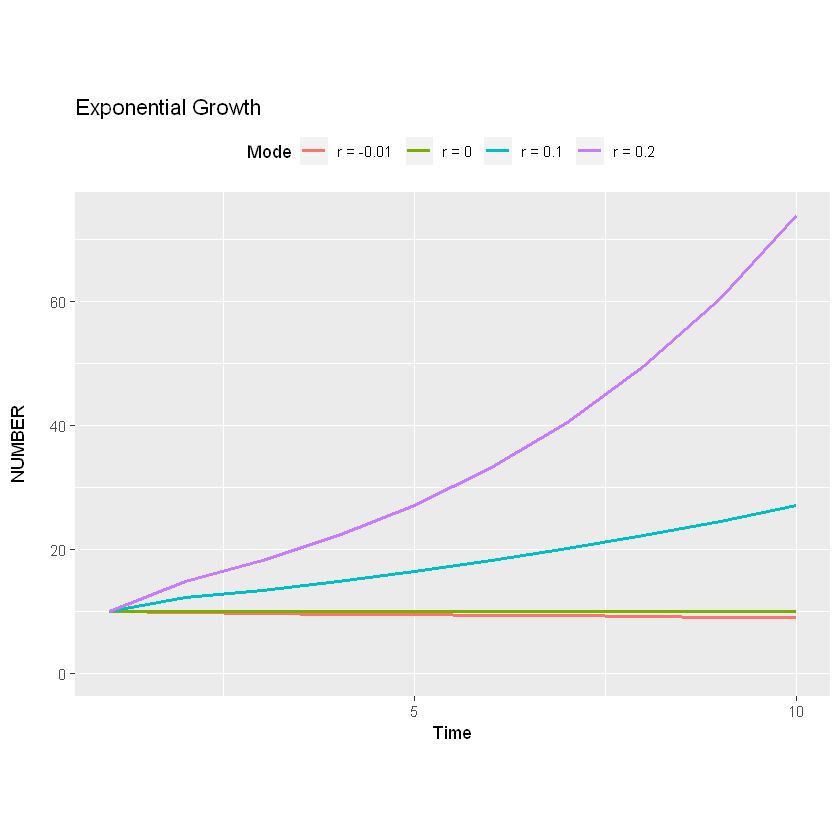

In [4]:
    Fig11 <- data.frame("Time" = time, "Number" = N[1,], "Mode" = rep("r = -0.01", length(time)))
    Fig12 <- data.frame("Time" = time, "Number" = N[2,], "Mode" = rep("r = 0", length(time)))
    Fig13 <- data.frame("Time" = time, "Number" = N[3,], "Mode" = rep("r = 0.1", length(time)))
    Fig14 <- data.frame("Time" = time, "Number" = N[4,], "Mode" = rep("r = 0.2", length(time)))
    Fig1 <- rbind(Fig11, Fig12, Fig13, Fig14)
  
  ggplot(Fig1, aes(x=Time, y=Number, color=Mode)) +
    geom_line(size=1) +
    scale_x_continuous(name="Time",  limits =c(1, T), breaks=seq(0, T, 5)) + 
    scale_y_continuous(name="NUMBER\n", limits = c(0, max(N[4,]))) +
    theme(aspect.ratio = 1/1.5) +  theme(legend.position = "top", legend.direction = "horizontal")+
    ggtitle(label = 'Exponential Growth')
   

Compare the projection equations for geometric and exponential growth. We find that 
$$ e^r = \lambda, \ln \lambda = r $$

In [39]:
# convert r to lambda 
lambda = vector() 
lambda[1] = exp(-0.01)
lambda[2] = exp(0)
lambda[3] = exp(0.1)  
lambda [4] = exp (0.2) 

# r 
r = vector ()
r[1] = -0.01
r[2] = 0
r[3] = 0.1
r[4] = 0.2

lambda_frame <- data.frame ( 

    Number = c(1:4), 
    lambda = lambda, 
    r = r
)

lambda_frame 

Number,lambda,r
1,0.9900498,-0.01
2,1.0000000,0.00
3,1.1051709,0.10
4,1.2214028,0.20


### Doubling time 

Sometimes we gain a more intuitive grasp of an idea when we convert to a different form of the same relationship. Exponential growth is one of those ideas that can be hard to grasp. A more intuitive way to compare or express exponential growth rate is through doubling time, the time required for the population to double in size. For instance, a per capita growth rate of $ r = 0.014 inds \times ind^-1y^-1 $ means that the population will double in less than 5 years.

We determine this by letting $ N_t = 2N_0 $
$$ 2N_0 = N_0e^{rt} $$
$$ \ln(2) = rt $$
$$ t = \frac {\ln 2} {r} $$


In [44]:
library('SciViews')
# r 
r = vector ()
r[1] = -0.01
r[2] = 0
r[3] = 0.1
r[4] = 0.2 

# Doubling time 
db = vector() 
for( i  in 1:length (r) ) {

    db [i] = ln (2) / r[i] 
    
}

db_frame <- data.frame ( 

    Number = c(1:4), 
    Doubling_time = db, 
    r = r
)
db_frame

Number,Doubling_time,r
1,-69.314718,-0.01
2,Inf,0.00
3,6.931472,0.10
4,3.465736,0.20


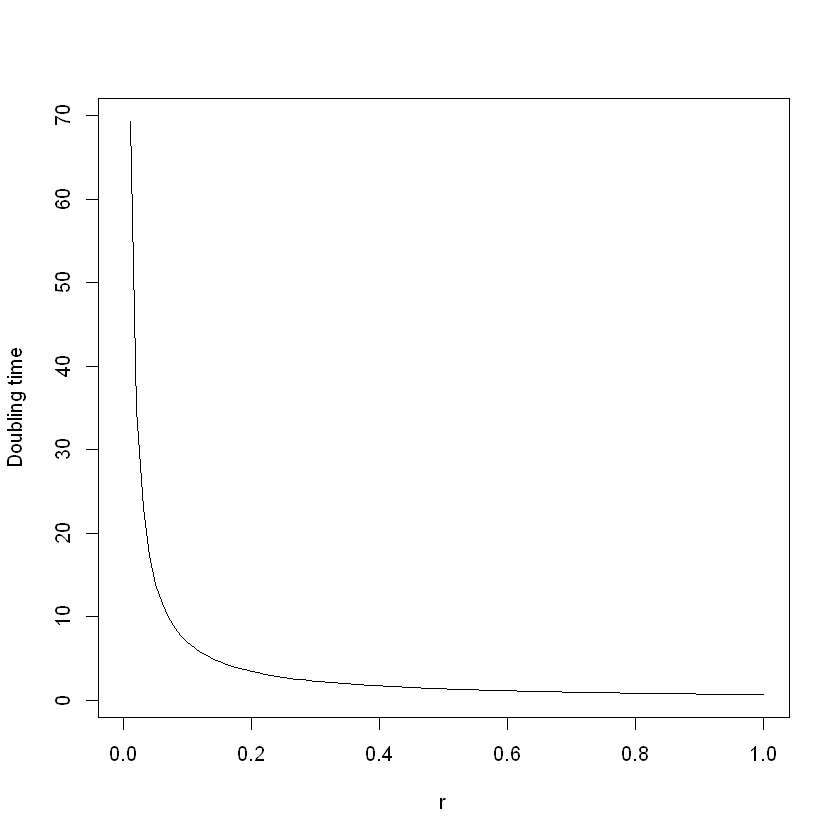

In [45]:
curve( log(2)/x, xlab="r", ylab="Doubling time")

In [10]:
sparrows <- data.frame (

    Year = c(1966:2001), 
    Count = c( 34, 40, 42, 54, 49, 71, 66, 56, 72, 77, 37, 32, 26, 22, 31, 28, 41, 36, 37, 44, 34, 47, 45, 41, 32, 40, 120, 96, 93, 67, 84, 90, 37, 34, 34, 43) 
    
)

In [11]:
sparrows

Year,Count
1966,34
1967,40
1968,42
1969,54
1970,49
1971,71
1972,66
1973,56
1974,72
1975,77


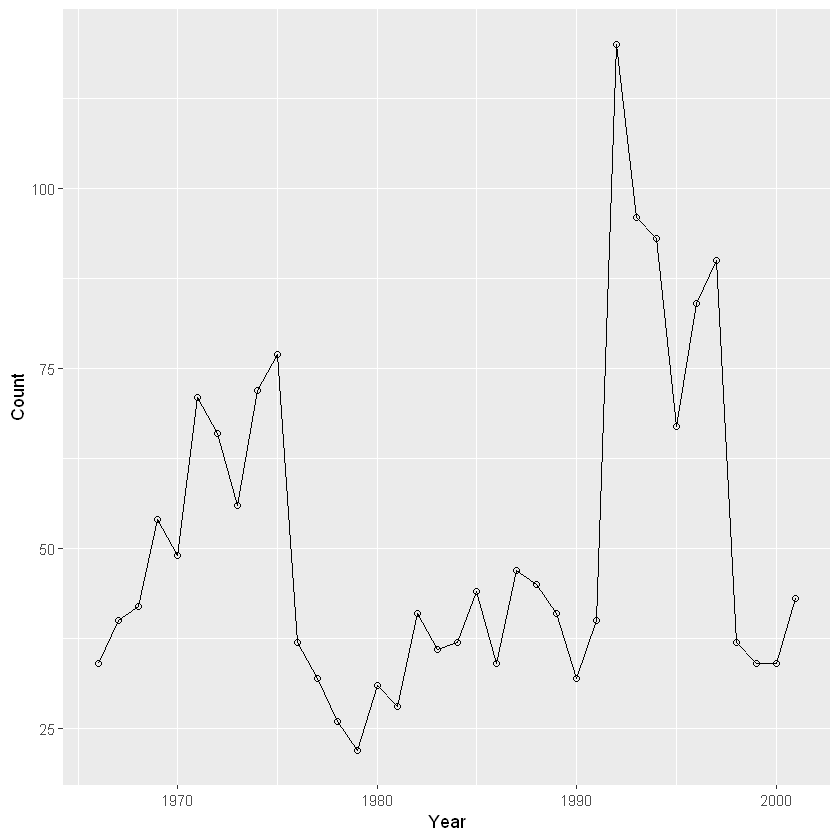

In [12]:
ggplot(sparrows, aes(x=Year, y=Count)) + geom_line() + geom_point(pch=1)

In [13]:
attach (sparrows) 

In [14]:
obs.R <- Count[-1]/Count[-length(Count)]

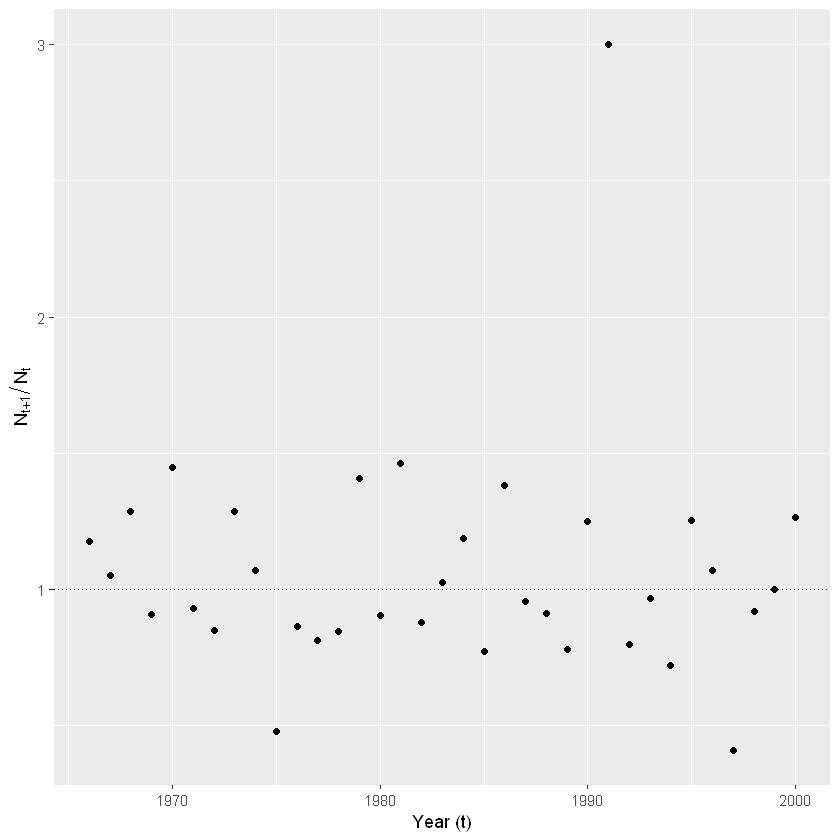

In [15]:
qplot(x=Year[-length(Count)], y=obs.R, geom="point") + geom_hline(yintercept=1, lty=3) + 
  labs(y=bquote(N[t+1]/N[t]), x="Year (t)")

###  Average growth rate 

Since growth rate varies from year to year, we may want to calculate average annual growth rate over several years. As we see below, however, the arithmetic averages are not really appropriate. How do we calculate an average growth rate for a fluctuating population? 

Consider that $N_{t+1}/N_t$ may be a random variable which we will call $R$. That is, this ratio from any one particular year could take on a wide variety of values, from close to zero, up to some (unknown) large number. Let’s pick two out of a hat, where $ R= 0.5, 1.5$. The arithmetic average of these is 1.0, so this mightseem to predict that, on average, the population does not change. Let’s project the population for two years using each $R$ once.

$N_0 = 100$
$N_1 = N_0(0.5) = 50$ 
$N-2 = N_1(1.5) = 75$

We started with 100 individuals, but the population shrank! Why did that happen? It happens because, in essence, we multiply the *λ* together, where $N_2 = N_0R_1R_2$. In this case, then, what is a sensible “average”?

How do we calculate an average for things that we multiply together? We would like a value for $R$ which would provide the solution to
$$
    \overline {R}^t = R_1 R_2 ... R_t 
$$
where $t$ is the number of time steps and $R_1$ is the observed finite rate of increase from year 1 to year 2. The bar over $R$ indicates a mean.

All we have to do is solve for $R$.
$$
    (\overline {R}^t)^{\frac {1}{t}} = (R_1 R_2 ... R_t)^{\frac {1}{t}}
$$
$$
    (\overline {R}) = (R_1 R_2 ... R_t)^{\frac {1}{t}}
$$
We take the $t$-th root of the product of all the R. This is called the *geometric average*. Another way of writing this would be to use the product symbol, Π, as in
$$
    (\overline {R}) = (\prod {R_i})^{\frac {1}{t}}
$$

If we examine the Song Sparrow data, we see that projections based on the geometric average R are less than when based on the arithmetic average; this is always the case.


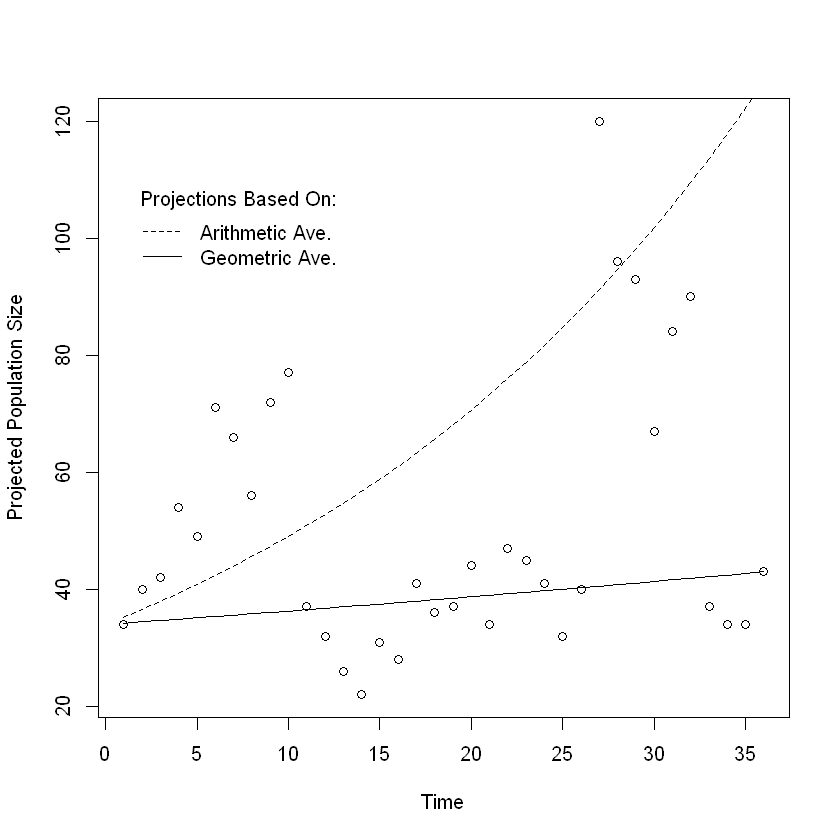

In [28]:
lam.A <- sum(obs.R)/length (Year) 
lam.G <- prod(obs.R)^(1/(length (Year) ))

N0 <- Count[1]
plot(1:length(Year), Count, ylab = "Projected Population Size", xlab = "Time")
lines(1:length(Year), N0 * lam.A^(1:length (Year)), lty = 2)
lines(1:length(Year), N0 * lam.G^(1:length (Year)), lty = 1)
legend(1, 110, c("Arithmetic Ave.", "Geometric Ave."), title = "Projections Based On:", lty = 2:1, bty = "n", xjust = 0)


